In [72]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize
from scipy.optimize import linprog
%matplotlib inline  

### Example of linear programming with  linprog 

In [73]:
c = [-2, -1]
A = [[1, 6], [2, 2], [4,1]]
b = [30,15,24]
x0_bounds = (0., None)
bounds=2*[x0_bounds]
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds)


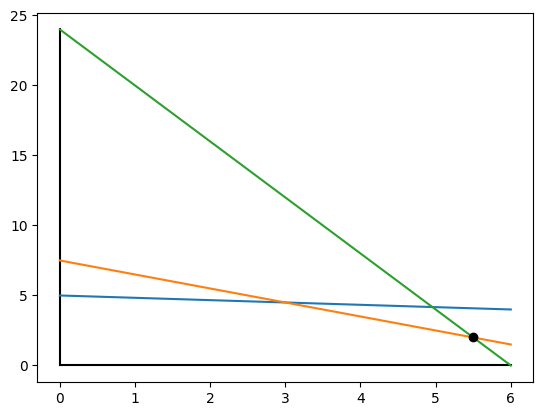

In [74]:

plt.plot([0,6],[0,0],'k')
plt.plot([0,0],[0,24],'k')
x=[0,6.]
y=[0,0.]
for i in range(3):
    for j in range(2):
        y[j]=(b[i]-A[i][0]*x[j])/A[i][1]
    plt.plot(x,y)
plt.plot(res.x[0],res.x[1],'ok')    
    

### Logistic problem: optimization of deliveries from warehouses to stores 

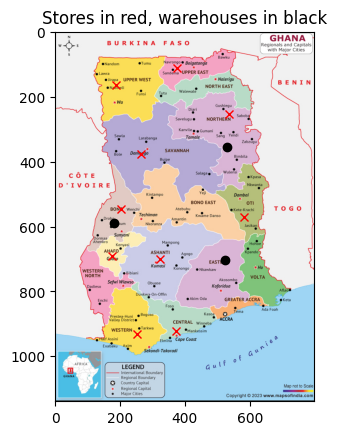

In [75]:
from PIL import Image
import matplotlib.pyplot as plt

# Upload the map
image_path = '../FIGURES/ghana.jpg'
image = Image.open(image_path)

stores=np.array([ (371.7646103896103, 920.623106060606), (251.57792207792204, 931.409090909091), (322.457251082251, 700.2808441558442), (174.53517316017314, 691.0357142857143), (202.27056277056272, 546.1953463203463), (265.4456168831168, 376.7012987012987), (536.636093073593, 253.4329004329004), (186.86201298701292, 164.06331168831161), (374.84632034632034, 111.67424242424227), (581.3208874458874, 569.3081709956709)])
warehouses=np.array([(530.4726731601731, 355.12932900432895), (182.239448051948, 587.7984307359308), (522.7683982683982, 703.3625541125541)])
# Display the map
plt.imshow(image)
plt.title("Stores in red, warehouses in black")
for s in stores:
    plt.plot(s[0],s[1],'rx')
for w in warehouses:
    plt.plot(w[0],w[1],'ok')
plt.savefig("ghana_map.png")
plt.show()

In [76]:
from scipy.spatial.distance import cdist
M=len(warehouses)
N=len(stores)
print(N," stores ",M," warehouses")
# Compute the distances
# Cm will be a matrix of shape (number of stores, number of warehouses)
Cm = cdist(stores, warehouses, metric='euclidean')
print(Cm)
# C will be a vector of shape NM inner dimension are the warehouses
C=np.reshape(Cm,N*M) 
print(C)

10  stores  3  warehouses
[[587.34271178 383.00398387 264.58324094]
 [640.21921727 350.53688788 354.32964499]
 [402.98881403 179.75907659 200.33485124]
 [489.41250861 103.52435736 348.45133096]
 [379.76683404  46.17425895 356.959933  ]
 [265.90353596 226.90364846 415.83962005]
 [101.88302768 487.23432746 450.14331742]
 [393.15964793 423.76033229 635.35562684]
 [288.94625949 513.60651276 609.89835163]
 [220.13204504 399.50955555 146.28387342]]
[587.34271178 383.00398387 264.58324094 640.21921727 350.53688788
 354.32964499 402.98881403 179.75907659 200.33485124 489.41250861
 103.52435736 348.45133096 379.76683404  46.17425895 356.959933
 265.90353596 226.90364846 415.83962005 101.88302768 487.23432746
 450.14331742 393.15964793 423.76033229 635.35562684 288.94625949
 513.60651276 609.89835163 220.13204504 399.50955555 146.28387342]


In [67]:
Aub=np.zeros((M,N*M)) # models the constraint on the warehouse stock
print(Aub,Aub[0,M])
for w in range(M):
    for s in range(N):
        Aub[w,s*M+w]=1
Aeq=np.zeros((N,N*M)) # models the constraint on the store order
for s in range(N):
    for w in range(M):
        Aeq[s,s*M+w]=1

Beq=np.array(random.sample(range(900), N))   # orders <900
stock=(np.sum(Beq)+100)/M;     # ideal stock to make sure the orders can be filled        
Bub=np.ones(M)*stock;                     # warehouses all have same stock
tup=(0,None)    # all deliveries must be positive
bounds=N*M*[tup]

x=linprog (C, A_ub=Aub, b_ub=Bub, A_eq=Aeq, b_eq=Beq,
		 bounds=bounds,  callback=None, options=None, x0=None)
print(x)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]] 0.0
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 888819.7943786852
              x: [ 0.000e+00  0.000e+00 ...  0.000e+00  2.740e+02]
            nit: 13
          lower:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              2.740e+02]
                 marginals: [ 3.043e+02  1.390e+02 ...  2.738e+02
                              0.000e+00]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+0

In [68]:
print(x)
result=x.x.reshape(N,M)
w_del=np.sum(result, axis=0)
s_del=np.sum(result, axis=1)
print(w_del)
for w in range(M):
    print('%1d th warehouse holds %4.0f and sends %4.0f' %(w,Bub[w],w_del[w]))
    for s in range(N):
        print('    %3.0f' %result[s,w],' to',s,'th store')


for s in range(N):
    print(s,'th store ordered ',Beq[s],' and receives ',s_del[s])
    for w in range(M):
        print('    %3.0f' %result[s,w],' from ',w,'th warehouse')


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 888819.7943786852
              x: [ 0.000e+00  0.000e+00 ...  0.000e+00  2.740e+02]
            nit: 13
          lower:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              2.740e+02]
                 marginals: [ 3.043e+02  1.390e+02 ...  2.738e+02
                              0.000e+00]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
                 marginals: [ 2.830e+02  3.728e+02  2.188e+02  1.425e+02
                              8.517e+01  2.659e+02  1.019

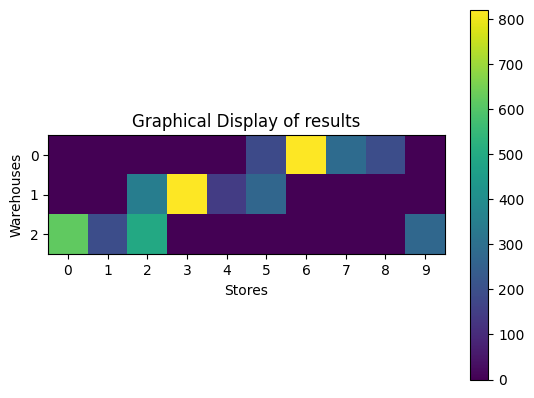

In [69]:
# Display the matrix using matplotlib
plt.imshow(result.T, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Show a colorbar
plt.title('Graphical Display of results')
plt.xlabel('Stores')
plt.xticks(range(N))
plt.ylabel('Warehouses')
plt.show()


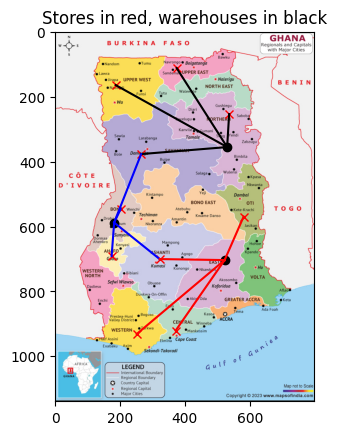

In [71]:
colors=['k','b','r','o','m','g']
plt.imshow(image)
plt.title("Stores in red, warehouses in black")
for s in stores:
    plt.plot(s[0],s[1],'rx')
for w in warehouses:
    plt.plot(w[0],w[1],'ok')
for w in range(M):
    for s in range(N):
        if result[s,w]>10:
            plt.plot([stores[s,0],warehouses[w,0]],[stores[s,1],warehouses[w,1]],colors[w%6])
plt.savefig("ghana_del.png")
